In [1]:
pip install --force-reinstall agent_system/dist/mesa_restaurant_agents-0.0.1-py3-none-any.whl

Processing c:\users\s.neumann\documents\11_master_cas\code\mesa-restaurant-agents\agent_system\dist\mesa_restaurant_agents-0.0.1-py3-none-any.whl
  Using cached mesa-3.1.0-py3-none-any.whl.metadata (9.9 kB)
  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.2.2-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl.metadata (15 kB)
  Using cached scipy-1.15.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.10.0-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached plotly-5.24.1-py3-none-any.whl.metadata (7.3 kB)
  Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp312-cp312-win_amd64.whl.metadata (103 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using 

In [2]:
import mesa
from mesa_restaurant_agents.model.restaurant_model import RestaurantModel

params = {"n_waiters":2, "grid_width":50, "grid_height": 50}

results = mesa.batch_run(
    RestaurantModel,
    parameters=params,
    iterations=5,
    max_steps=10,
    number_processes=1,
    data_collection_period=1,
    display_progress=True,
)
print(results)

  0%|          | 0/5 [00:00<?, ?it/s]

TypeError: object of type 'NoneType' has no len()

c:\Users\s.neumann\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\s.neumann\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[Text(0.5, 1.0, 'Visualization of agents in grid')]

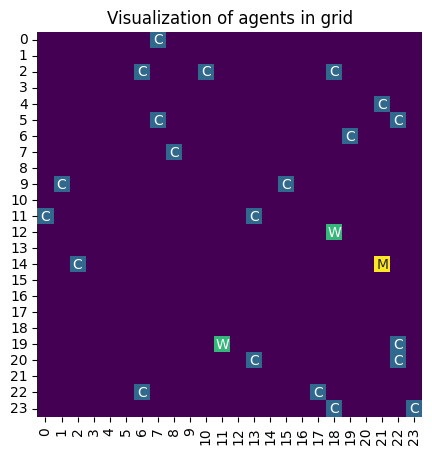

In [3]:
import seaborn as sns
import numpy as np
from mesa_restaurant_agents.agents.customer_agent import CustomerAgent
from mesa_restaurant_agents.agents.manager_agent import ManagerAgent
from mesa_restaurant_agents.agents.waiter_agent import WaiterAgent
from mesa_restaurant_agents.utils.environment_definition import EnvironmentDefinition

model = RestaurantModel(n_waiters=2, grid_width=23, grid_height=23)
for i in range(10):
    model.step()

agents_position = np.zeros((model.grid.width, model.grid.height))
for cell_content, (x, y) in model.grid.coord_iter():
    if len(cell_content) > 0:
        if isinstance(cell_content[0], CustomerAgent):
            agents_position[x][y] = EnvironmentDefinition.OCCUPIED_TABLE.value
        elif isinstance(cell_content[0], WaiterAgent):
            agents_position[x][y] = EnvironmentDefinition.OCCUPIED.value
        else:
            agents_position[x][y] = 5

for x in range(len(model.environment)):
    for y in range(len(model.environment[x])):
        if model.environment[x][y] == EnvironmentDefinition.FREE_TABLE:
            agents_position[x][y] = EnvironmentDefinition.FREE_TABLE.value
        elif model.environment[x][y] == EnvironmentDefinition.KITCHEN:
            agents_position[x][y] = EnvironmentDefinition.KITCHEN.value

mapping = {0: "", EnvironmentDefinition.FREE_TABLE.value: "",
           EnvironmentDefinition.KITCHEN.value: "",
           EnvironmentDefinition.OCCUPIED_TABLE.value: "C",
           EnvironmentDefinition.OCCUPIED.value: "W", 5: "M"}

annot = np.vectorize(mapping.get)(agents_position)
    
# Plot using seaborn, with a visual size of 5x5
g = sns.heatmap(agents_position, cmap="viridis", annot=annot, cbar=False, square=True, fmt="")
g.figure.set_size_inches(5, 5)
g.set(title="Visualization of agents in grid")

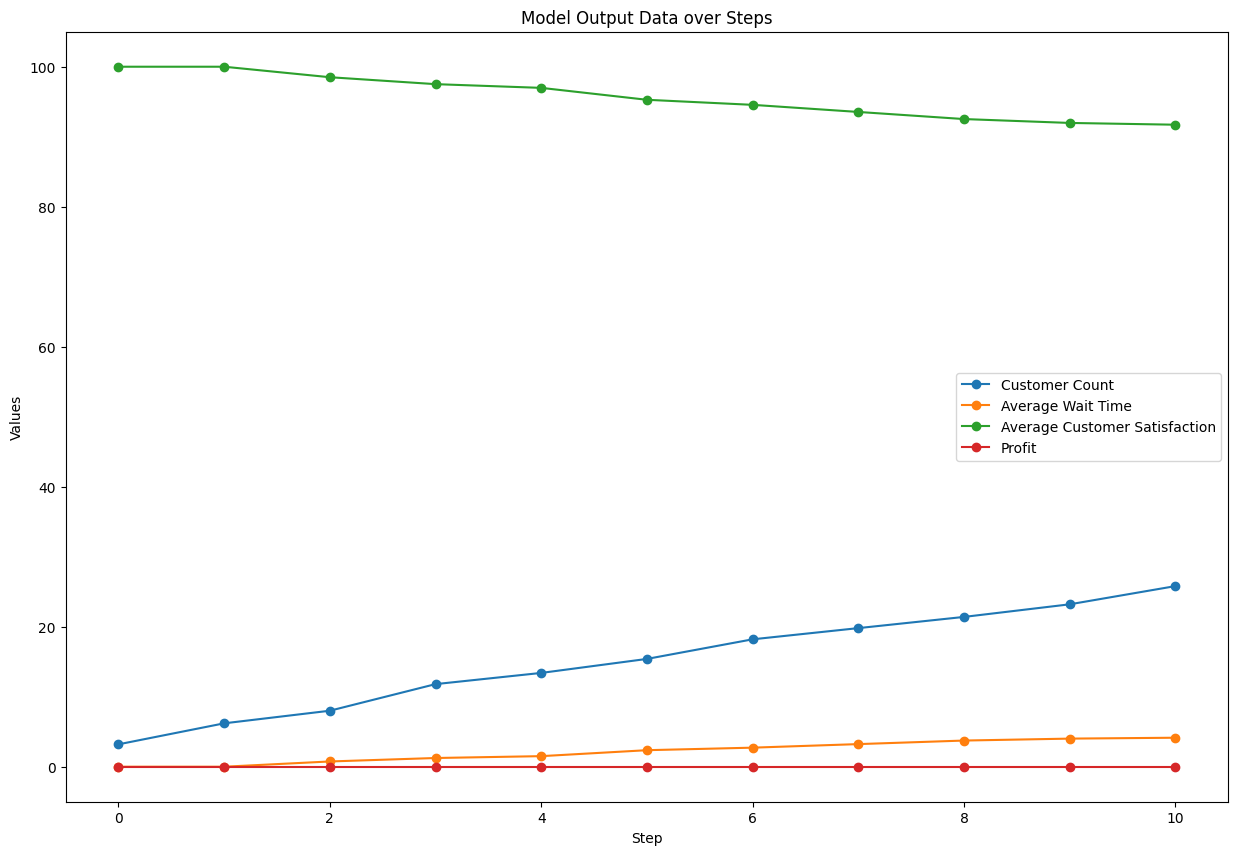

None


None


None


None


None


None


None


In [4]:
from mesa_restaurant_agents.visualization import *

df_mean_step = display_mean_step_results(results)
df_first_run_customer = display_first_run_step_results_customer(results)
df_first_run_waiter = display_first_run_step_results_waiter(results)

In [5]:
df_mean_step

,Step,mean_customer_count,mean_waiting_time,mean_customer_satisfaction,mean_profit
0,0,3.2,0.000000,100.000000,0.0
1,1,6.2,0.000000,100.000000,0.0
2,2,8.0,0.750000,98.500000,0.0
3,3,11.8,1.244755,97.510490,0.0
4,4,13.4,1.510490,96.979021,0.0
5,5,15.4,2.361372,95.277256,0.0
6,6,18.2,2.722773,94.554454,0.0
7,7,19.8,3.230482,93.539036,0.0
8,8,21.4,3.738178,92.523643,0.0
9,9,23.2,4.015183,91.969635,0.0


In [6]:
df_first_run_customer.sort_values(['customer_nr', 'step'])

,customer_nr,waiting_time,order_status,satisfaction,step
0,4,0.0,1,100.0,0
5,4,0.0,3,100.0,1
13,4,0.0,3,100.0,2
21,4,0.0,3,100.0,3
32,4,0.0,3,100.0,4
...,...,...,...,...,...
142,28,0.0,1,100.0,9
167,28,0.0,1,100.0,10
168,29,0.0,1,100.0,10
169,30,0.0,1,100.0,10


In [7]:
df_first_run_waiter.sort_values(['waiter_nr', 'step'])

,waiter_nr,current_orders,tips,avg_rating,served_customers,step
0,1,{},0,0,0,0
2,1,{},0,0,1,1
4,1,{},0,0,2,2
6,1,{},0,0,3,3
8,1,{},0,0,4,4
10,1,{},0,0,5,5
12,1,{},0,0,6,6
14,1,{},0,0,7,7
16,1,{},0,0,8,8
18,1,{},0,0,9,9
